**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [2]:
#Importing dataframe
import pandas as pd
df = pd.read_csv('web_sites_data.csv')

In [15]:
df

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."
...,...
71694,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n..."
71695,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
71696,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
71697,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n..."


#### Data processing

In [121]:
#Libs initialization
import re
import nltk
import numpy as np
from nltk.corpus import wordnet 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sorok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sorok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sorok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sorok\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sorok\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sorok\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [125]:
#Building a preprocessing function
def preprocessing(input_text):
    
    #Remove HTML stuff
    soup = BeautifulSoup(input_text)
    text = soup.get_text()

    #Lowercase
    text = text.lower()

    #Direct adjustments to the text
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub("_", " ", text)

    #Stop words
    text_tokens = text.split()
    stop_words = stopwords.words('english')
    my_stop_words = ['x', 'u']
    stop_words.extend(my_stop_words)
    text = [token for token in text_tokens if not token in stop_words]

    #Lemmatizing
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]

    #Getting rid of everything what is a not an english word
    text = " ".join(text)
    words = set(nltk.corpus.words.words())
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words)

    return text

In [126]:
#Testing on the 1st row
preprocessing(df['text'][0])

'eric love war eric love war author eric title love war copy copy available suggest short walk shore last grain low gear recommend box recommendation topic memoir war publish bind audio page date publisher audio weight pound size inch edition abridge price previous giver oh previous moocher ca description book description make peace summer ally pow eric among walk away prison camp occupy german camp behind line go mountain help local evade retreat enemy peasant shelter three month classic memoir recall selfless people unchanging funny bizarre dangerous incident hope local girl later become wife excite story superbly tell punch relate interest hood passage freedom available bot add save later web site relate edition recommend'

In [127]:
df_list = []
for i in tqdm(range(1000)):     #range(df.shape[0]) takes too long (80000 takes about 3 hours), so just 1000 rows for now
    df_list.append(preprocessing(df['text'][i]))

100%|██████████| 1000/1000 [01:47<00:00,  9.29it/s]


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [129]:
#Making a 1 textfile with all the text
full_text = " ".join(df_list)

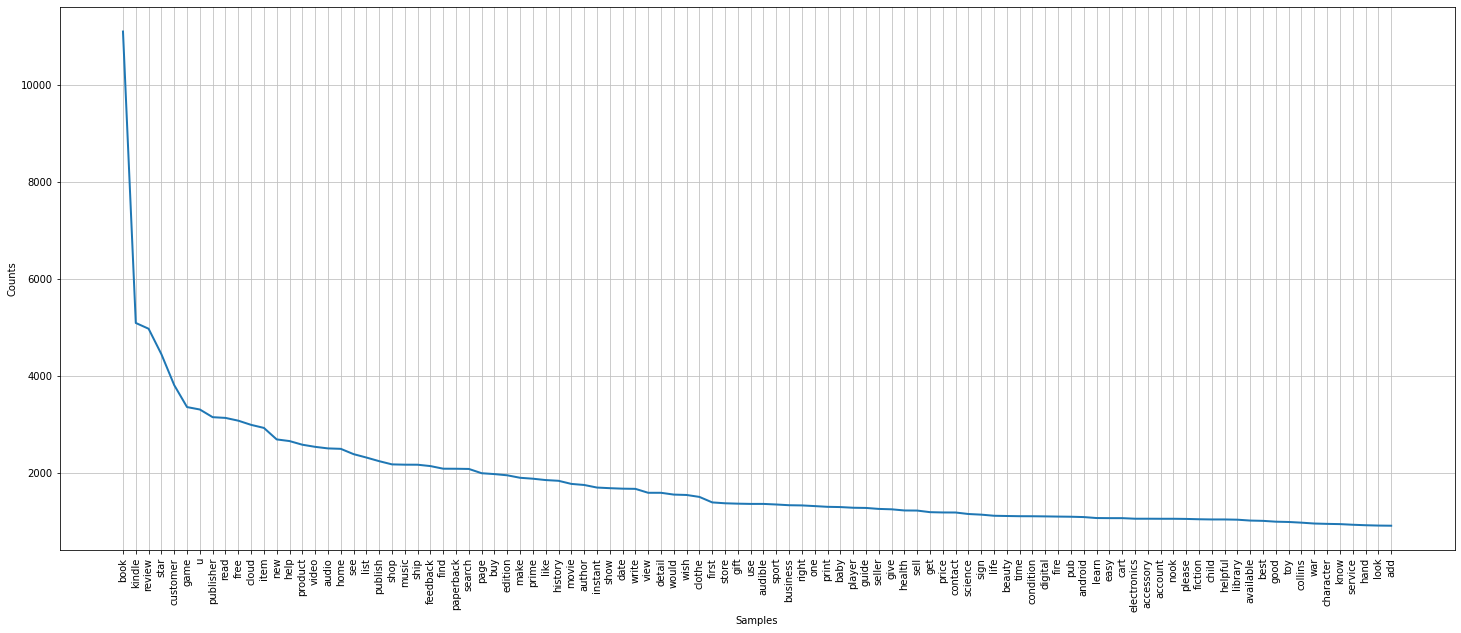

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [137]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
graph = FreqDist(full_text.split())
graph.plot(100)

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [134]:
#Printing first 3000 symbols of the cleaned text as an example
full_text[:3000]

'eric love war eric love war author eric title love war copy copy available suggest short walk shore last grain low gear recommend box recommendation topic memoir war publish bind audio page date publisher audio weight pound size inch edition abridge price previous giver oh previous moocher ca description book description make peace summer ally pow eric among walk away prison camp occupy german camp behind line go mountain help local evade retreat enemy peasant shelter three month classic memoir recall selfless people unchanging funny bizarre dangerous incident hope local girl later become wife excite story superbly tell punch relate interest hood passage freedom available bot add save later web site relate edition recommend eric short walk eric short walk author eric title short walk copy copy available recommend tree world dozen pad bookseller lovely three cup tea one man mission elegance banner heaven story pat parker unleash feminism critique smith tear longitude true story lone fi

In [ ]:
"we lost some information about words with numbers and words with written mistakes in them"

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [163]:
#Shingling our textfiles
#https://stackoverflow.com/questions/58363074/efficient-shingling-algorithm
def ngrams2(text, size):
    tokens = text.split()
    return [' '.join(tokens[i:i+size]) for i in range(len(tokens) - size + 1)]

#Shingle k = 3
df_ngrams = []
for i in range(1000):
    df_ngrams.append(ngrams2(df_list[i],3))

In [183]:
#MinHashLSH with datasketch library:
from datasketch import MinHash, MinHashLSH

m_list = []
for i in range(1000):
    m_list.append(MinHash(num_perm=128))

for i in range(1000):
    for d in df_ngrams[i]:
        m_list[i].update(d.encode('utf8'))

lsh = MinHashLSH(threshold=0.5, num_perm=128)
for i in range(1000):
    lsh.insert("m"+str(i), m_list[i])

In [185]:
s = 0
for i in range(1000):
    q = lsh.query(m_list[i])
    q.remove('m'+str(i))
    print("Approximate neighbours with Jaccard similarity > 0.5 for m" + str(i) + ':', q)
    if not q:
        s+=1

Approximate neighbours with Jaccard similarity > 0.5 for m0: ['m469']
Approximate neighbours with Jaccard similarity > 0.5 for m1: ['m470']
Approximate neighbours with Jaccard similarity > 0.5 for m2: ['m471']
Approximate neighbours with Jaccard similarity > 0.5 for m3: ['m472']
Approximate neighbours with Jaccard similarity > 0.5 for m4: ['m473']
Approximate neighbours with Jaccard similarity > 0.5 for m5: ['m474']
Approximate neighbours with Jaccard similarity > 0.5 for m6: ['m475']
Approximate neighbours with Jaccard similarity > 0.5 for m7: ['m476']
Approximate neighbours with Jaccard similarity > 0.5 for m8: ['m477']
Approximate neighbours with Jaccard similarity > 0.5 for m9: ['m478']
Approximate neighbours with Jaccard similarity > 0.5 for m10: ['m479']
Approximate neighbours with Jaccard similarity > 0.5 for m11: ['m480']
Approximate neighbours with Jaccard similarity > 0.5 for m12: ['m481']
Approximate neighbours with Jaccard similarity > 0.5 for m13: ['m19', 'm488', 'm21', 'm

In [194]:
print('Total unique files among these 1000:', s)

Total unique files among these 1000: 17


# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.